# Data generation

필요한 library 들을 import 하자

In [1]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

data를 sample해서... train/test data를 만들자.

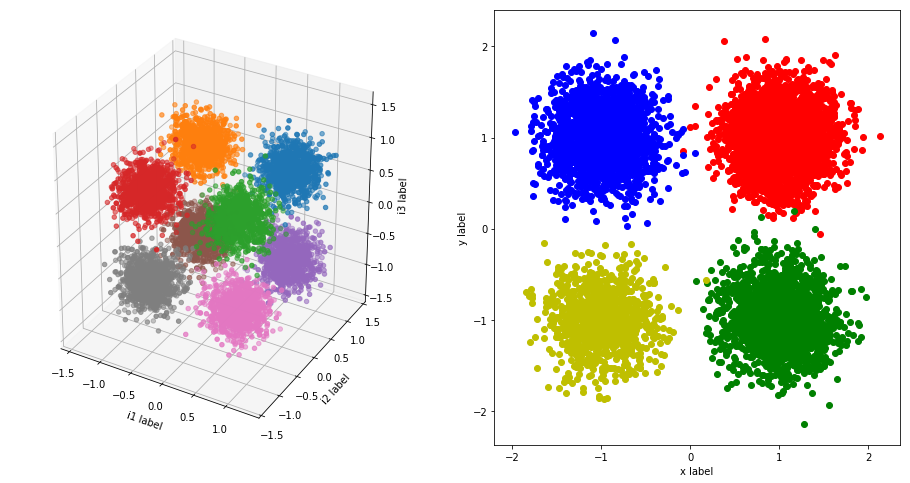

In [2]:
np.random.seed(int(time.time()))

num_of_samples = 30000
num_of_selected_samples = 1000
num_of_input_class = 8

#sampler
mod1=lambda t:np.random.normal(0.7,0.2,t)
mod2=lambda t:np.random.normal(-0.7,0.2,t)
labelmod1=lambda t:np.random.normal(1.0,0.3,t) # output
labelmod2=lambda t:np.random.normal(-1.0,0.3,t) # output

#sampling
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
x = y = z = []
color = 'r'

sample_data = dict()
sample_data['i1'] = []
sample_data['i2'] = []
sample_data['i3'] = []
sample_data['x'] = []
sample_data['y'] = []

for i in range(num_of_input_class):
    if (i & 1) == 0:
        x = mod1(num_of_samples) 
        #print('x positive')
    else:
        x = mod2(num_of_samples) 
        #print('x negative')
    sample_i1 = x[np.random.randint(0, num_of_samples, num_of_selected_samples)]    
    
    if (i & 2) == 0:
        y = mod1(num_of_samples)
        #print('y positive')
    else:
        y = mod2(num_of_samples) 
        #print('y negative')
    sample_i2 = y[np.random.randint(0, num_of_samples, num_of_selected_samples)]          
    if (i & 4) == 0:
        z = mod1(num_of_samples) 
        #print('z positive')
    else:
        z = mod2(num_of_samples) 
        #print('z negative')
    sample_i3 = z[np.random.randint(0, num_of_samples, num_of_selected_samples)] 
    ax.scatter(sample_i1, sample_i2, sample_i3)
    sample_data['i1'] += list(sample_i1)
    sample_data['i2'] += list(sample_i2)
    sample_data['i3'] += list(sample_i3)
    
    if i <= 2:
        x = labelmod1(num_of_samples)
        y = labelmod1(num_of_samples)
        color = 'r'
    elif i <= 4:
        x = labelmod1(num_of_samples)
        y = labelmod2(num_of_samples)
        color = 'g'
    elif i <= 6:
        x = labelmod2(num_of_samples)
        y = labelmod1(num_of_samples) 
        color = 'b'
    else:
        x = labelmod2(num_of_samples)
        y = labelmod2(num_of_samples)
        color = 'y'
    sample_x = x[np.random.randint(0, num_of_samples, num_of_selected_samples)]  
    sample_y = y[np.random.randint(0, num_of_samples, num_of_selected_samples)]
    sample_data['x'] += list(sample_x)
    sample_data['y'] += list(sample_y)
    ax2.scatter(sample_x, sample_y, c = color)
ax.set_xlabel('i1 label')
ax.set_ylabel('i2 label')
ax.set_zlabel('i3 label')

ax2.set_xlabel('x label')
ax2.set_ylabel('y label')

plt.show()

sampling한 data의 수가 적절한지 확인

In [3]:
for data in sample_data.items():
    print('list of %s : %d' % (data[0],len(data[1])))

list of y : 8000
list of x : 8000
list of i1 : 8000
list of i3 : 8000
list of i2 : 8000


sampling한 data를 file out 한다.

In [4]:
data_filename = './data/sampling_data_3x3_to_2x2_regression.csv'
csv_data = pd.DataFrame(sample_data)
csv_data.to_csv(data_filename)

# Checkpoint #1

input data를 loading 한다.

In [5]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import os

data_filename = './data/sampling_data_3x3_to_2x2_regression.csv'

data = pd.read_csv(data_filename, sep=',')
input_data = data.to_dict()
data.head()

num_of_input = 3
num_of_output = 2

만들어진 sample을 train, test set으로 구분한다.

In [6]:
from sklearn.model_selection import train_test_split

i1_train, i1_test, i2_train, i2_test, i3_train, i3_test, x_train, x_test, y_train, y_test = train_test_split( \
    input_data['i1'], input_data['i2'], input_data['i3'], input_data['x'], input_data['y'], test_size=0.2, random_state=0)

# print('size of train = %d, test = %d' % (len(i1_train), len(i1_test)))
# for i in range(10):
#     print('(%f, %f, %f) => (%f,%f)'%(i1_train[i],i2_train[i],i3_train[i],x_train[i],y_train[i]))

print('\n')
train_input_set = np.array([i1_train, i2_train, i3_train])
train_label_set = np.array([x_train, y_train])
test_input_set = np.array([i1_test, i2_test, i3_test])
test_label_set = np.array([x_test, y_test])

train_input_set = train_input_set.T
train_label_set = train_label_set.T
test_input_set = test_input_set.T
test_label_set = test_label_set.T

for i in range(10):
    print('(%f, %f, %f) => (%f,%f)'%(train_input_set[i][0],train_input_set[i][1],train_input_set[i][2],train_label_set[i][0],train_label_set[i][1]))



(-0.951230, 0.958649, 1.001906) => (0.860259,1.519697)
(-0.512473, -0.653884, -0.635869) => (-0.634426,-0.968299)
(-0.714475, 0.965987, -0.861274) => (-1.070083,0.474300)
(-0.724096, -0.376273, -0.315213) => (-0.917627,-1.388046)
(0.921859, -0.766486, -0.636541) => (-0.952001,0.750895)
(0.385442, 0.863812, -1.081087) => (0.987873,-1.233122)
(-0.827045, 0.843419, -0.850811) => (-1.107559,0.748293)
(-0.738343, -0.604638, -0.478177) => (-0.726757,-0.649258)
(0.608683, -0.877960, -0.893614) => (-0.307998,1.216712)
(0.692258, 0.682883, 0.408521) => (0.929874,1.373876)


input data의 모양을 보자

In [7]:
#print shape of data
# print(tf.convert_to_tensor(train_input_set))
# print(tf.convert_to_tensor(train_label_set))
# print(tf.convert_to_tensor(test_input_set))
# print(tf.convert_to_tensor(test_label_set))

training을 위한 hyper parameter setting

In [8]:
EPOCHS = 200
BATCH_SIZE = 32
KEEP_PROB = 0.5
COUT_OF_NO_IMPROVEMENT = 10
LEARNIN_RATE = 1e-5

n_batches = int(len(train_input_set)/BATCH_SIZE)
model_save_path = './trained_model/model.ckpt'

MC-dropout의 network 구성

In [9]:
# Remove the previous weights and bias
tf.reset_default_graph()

#batch_size = tf.placeholder(tf.int64, name='batch_size')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

x = tf.placeholder(tf.float32, shape=[None,num_of_input], name='x')
y = tf.placeholder(tf.float32, shape=[None,num_of_output], name='y')
is_training = tf.placeholder(tf.bool, name='is_training')

# dataset = tf.data.Dataset.from_tensor_slices((x, y)).batch(batch_size).repeat()

# iter = dataset.make_initializable_iterator(shared_name='make_iterator')
# features, labels = iter.get_next()

W1 = tf.Variable(tf.random_normal([num_of_input, 3000], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(x, W1))
#L1 = tf.contrib.layers.batch_norm(L1, center=True, scale=True, is_training=is_training, reuse=True, scope='bn')
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([3000, 3000], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
#L2 = tf.contrib.layers.batch_norm(L2, center=True, scale=True, is_training=is_training, reuse=True, scope='bn')
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([3000, 3000], stddev=0.01))
L3 = tf.nn.relu(tf.matmul(L2, W3))
#L3 = tf.contrib.layers.batch_norm(L3, center=True, scale=True, is_training=is_training, reuse=True, scope='bn')
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([3000, num_of_output], stddev=0.01))
logits = tf.matmul(L3, W4, name='logits')

# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y), name='loss')
# train_op = tf.train.AdamOptimizer(LEARNIN_RATE).minimize(loss)

# loss = tf.losses.mean_squared_error(logits, labels)
loss = tf.reduce_mean(tf.squared_difference(logits, y), name='loss')
train_op = tf.train.AdamOptimizer(LEARNIN_RATE).minimize(loss)

saver를 선언해서, model과 학습된 weight를 저장하자.

In [10]:
saver = tf.train.Saver()

training을 해보자.

In [11]:
with tf.Session() as sess:
#     init = tf.global_variables_initializer()
#     config = tf.ConfigProto()
#     config.gpu_options.allow_growth = True
#     config.allow_soft_placement = True
#     config.log_device_placement = False
#     sess = tf.Session(config=config)
    sess.run(tf.global_variables_initializer())
    
    # initialise iterator with train data
    #sess.run(iter.initializer, feed_dict={x: train_input_set, y: train_label_set, batch_size: BATCH_SIZE})
    print('Training... n_epochs=%d, n_batches=%d'%(EPOCHS, n_batches))
    num_of_no_improvement = 0
    min_loss = 10000000
    stop_training = False
    for i in range(EPOCHS):
        tot_loss = 0
        for j in range(n_batches):
            bx = train_input_set[j*BATCH_SIZE:(j+1)*BATCH_SIZE,:]
            by = train_label_set[j*BATCH_SIZE:(j+1)*BATCH_SIZE,:]
            _, loss_value = sess.run([train_op, loss], feed_dict={x:bx, y:by, is_training:True, keep_prob: KEEP_PROB})
            tot_loss += loss_value
        if i%10 == 0:
            if min_loss > (tot_loss / n_batches) :
                min_loss = tot_loss / n_batches
                num_of_no_improvement = 0;
            else :
                num_of_no_improvement += 1
                if num_of_no_improvement >= COUT_OF_NO_IMPROVEMENT :
                    stop_training = True
            print("epoch: %d, error: %.4f, num_of_no_improvement: %d"%(i, tot_loss / n_batches, num_of_no_improvement))
        if stop_training == True :
            break;
                
    error = sess.run(loss, feed_dict={x: test_input_set, y: test_label_set, is_training: False, keep_prob: KEEP_PROB})
    print('Test Loss: %.4f'%(error)) # MC_dropout은 0에서 1사이 값을 넣어야 함 
    
    # save the model
    save_path = saver.save(sess, model_save_path)
    print("Model saved in path: %s" % save_path)

Training... n_epochs=200, n_batches=200
epoch: 0, error: 0.9205, num_of_no_improvement: 0
epoch: 10, error: 0.1380, num_of_no_improvement: 0
epoch: 20, error: 0.1292, num_of_no_improvement: 0
epoch: 30, error: 0.1262, num_of_no_improvement: 0
epoch: 40, error: 0.1239, num_of_no_improvement: 0
epoch: 50, error: 0.1217, num_of_no_improvement: 0
epoch: 60, error: 0.1217, num_of_no_improvement: 0
epoch: 70, error: 0.1217, num_of_no_improvement: 0
epoch: 80, error: 0.1197, num_of_no_improvement: 0
epoch: 90, error: 0.1196, num_of_no_improvement: 0
epoch: 100, error: 0.1197, num_of_no_improvement: 1
epoch: 110, error: 0.1190, num_of_no_improvement: 0
epoch: 120, error: 0.1183, num_of_no_improvement: 0
epoch: 130, error: 0.1183, num_of_no_improvement: 1
epoch: 140, error: 0.1175, num_of_no_improvement: 0
epoch: 150, error: 0.1181, num_of_no_improvement: 1
epoch: 160, error: 0.1180, num_of_no_improvement: 2
epoch: 170, error: 0.1180, num_of_no_improvement: 3
epoch: 180, error: 0.1179, num_of_n

# Checkpoint #2

학습된 newtwork meta data와 weight로 prediction을 수행한다.

In [12]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import os

KEEP_PROB = 0.5

# Remove previous Tensors and Operations
tf.reset_default_graph()

model_save_path = './trained_model/model.ckpt'
model_meta_path = './trained_model/model.ckpt.meta'

test data loading

In [13]:
test_set = [[1.0, 1.0, 1.0], [-1.0, 1.0, 1.0], [1.0, -1.0, 1.0], [-1.0, -1.0, 1.0], 
            [1.0, 1.0, -1.0], [-1.0, 1.0, -1.0], [1.0, -1.0, -1.0], [-1.0, -1.0, -1.0],
           [0.7, 0.7, 0.7], [-0.7, 0.7, 0.7], [0.7, -0.7, 0.7], [-0.7, -0.7, 0.7], 
            [0.7, 0.7, -0.7], [-0.7, 0.7, -0.7], [0.7, -0.7, -0.7], [-0.7, -0.7, -0.7],
           [0.5, 0.5, 0.5], [-0.5, 0.5, 0.5], [0.5, -0.5, 0.5], [-0.5, -0.5, 0.5], 
            [0.5, 0.5, -0.5], [-0.5, 0.5, -0.5], [0.5, -0.5, -0.5], [-0.5, -0.5, -0.5],
           [0.3, 0.3, 0.3], [-0.3, 0.3, 0.3], [0.3, -0.3, 0.3], [-0.3, -0.3, 0.3], 
            [0.3, 0.3, -0.3], [-0.3, 0.3, -0.3], [0.3, -0.3, -0.3], [-0.3, -0.3, -0.3],
           [0.1, 0.1, 0.1], [-0.1, 0.1, 0.1], [0.1, -0.1, 0.1], [-0.1, -0.1, 0.1], 
            [0.1, 0.1, -0.1], [-0.1, 0.1, -0.1], [0.1, -0.1, -0.1], [-0.1, -0.1, -0.1]
           ] # x y z

test data의 regression 결과 확인

In [14]:
# Launch the graph
with tf.Session() as sess:
    saver = tf.train.import_meta_graph(model_meta_path)
    saver.restore(sess, model_save_path)
  
    graph = tf.get_default_graph()
    
    x = graph.get_tensor_by_name('x:0')
    is_training = graph.get_tensor_by_name('is_training:0')
    keep_prob = graph.get_tensor_by_name('keep_prob:0')
    logits = graph.get_tensor_by_name('logits:0')

    regression_result = sess.run(logits, feed_dict={x: test_set, is_training: False, keep_prob: KEEP_PROB})
    print('\nResult #1 : 1.0')
    print(regression_result[:8])
    print('\nResult # : 0.7')
    print(regression_result[8:16])   
    print('\nResult # : 0.5')
    print(regression_result[16:24])   
    print('\nResult # : 0.3')
    print(regression_result[24:32])  
    print('\nResult # : 0.1')
    print(regression_result[32:40]) 

INFO:tensorflow:Restoring parameters from ./trained_model/model.ckpt

Result #1 : 1.0
[[ 1.2362356  1.2539612]
 [ 1.2647994  1.2627716]
 [ 1.408303   1.6187695]
 [ 1.4805058 -1.3486755]
 [ 1.252264  -1.2280407]
 [-1.32199    1.3799279]
 [-1.4852407  1.490258 ]
 [-1.2799284 -1.3753905]]

Result # : 0.7
[[ 0.8395646   0.99318635]
 [ 0.9398862   1.0318072 ]
 [ 1.0864516   1.101727  ]
 [ 0.8502779  -0.8773277 ]
 [ 0.98170006 -0.9267874 ]
 [-0.89720666  0.9717002 ]
 [-1.0066917   0.9258175 ]
 [-0.894001   -0.9136465 ]]

Result # : 0.5
[[ 0.6858758   0.7204566 ]
 [ 0.6774332   0.62212247]
 [ 0.64481235  0.6657646 ]
 [ 0.6902503  -0.71349144]
 [ 0.70853794 -0.66908634]
 [-0.6790981   0.6713148 ]
 [-0.57240117  0.64766794]
 [-0.7706317  -0.69424576]]

Result # : 0.3
[[ 0.39117083  0.3892833 ]
 [ 0.37762997  0.4181208 ]
 [ 0.3728057   0.36825144]
 [ 0.370367   -0.40237272]
 [ 0.42050076 -0.4097851 ]
 [-0.41299313  0.37199813]
 [-0.42821965  0.39910156]
 [-0.41321927 -0.41534224]]

Result # : 0.